<a href="https://colab.research.google.com/github/amit4257/midsem2021_sem7/blob/main/midsem7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = '/content/drive/MyDrive/Data Science/Datasets/train'
valid_path = '/content/drive/MyDrive/Data Science/Datasets/valid'

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('/content/drive/MyDrive/Data Science/Datasets/train/*')

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data Science/Datasets/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18385 images belonging to 10 classes.


In [14]:
valid_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data Science/Datasets/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
575/575 [==============================] - 4261s 7s/step - loss: 2.7853 - accuracy: 0.6893 - val_loss: 2.4268 - val_accuracy: 0.7272
Epoch 2/5
575/575 [==============================] - 294s 511ms/step - loss: 2.3296 - accuracy: 0.7890 - val_loss: 2.1605 - val_accuracy: 0.8131
Epoch 3/5
575/575 [==============================] - 292s 508ms/step - loss: 1.9720 - accuracy: 0.8263 - val_loss: 1.8876 - val_accuracy: 0.8349
Epoch 4/5
575/575 [==============================] - 293s 509ms/step - loss: 2.0603 - accuracy: 0.8385 - val_loss: 2.0566 - val_accuracy: 0.8371
Epoch 5/5
575/575 [==============================] - 292s 507ms/step - loss: 1.9293 - accuracy: 0.8530 - val_loss: 3.1267 - val_accuracy: 0.7926


In [16]:
import matplotlib.pyplot as plt

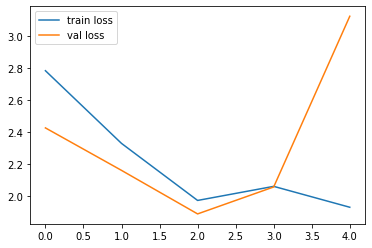

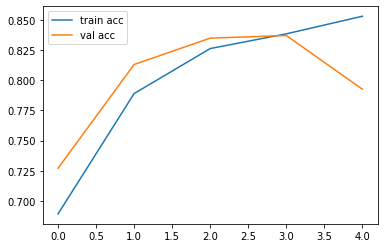

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [20]:
y_pred = model.predict(valid_set)

In [21]:
y_pred

array([[0.0000000e+00, 1.2331399e-16, 0.0000000e+00, ..., 1.5032951e-34,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.0656706e-25, 2.4041214e-25, ..., 0.0000000e+00,
        7.2233719e-22, 2.6409401e-36],
       [7.0009585e-22, 9.9973112e-01, 9.3552980e-19, ..., 1.6600016e-23,
        7.7346100e-24, 0.0000000e+00],
       ...,
       [2.8313197e-37, 6.3517183e-09, 6.2345479e-31, ..., 1.8265553e-34,
        3.1977453e-24, 5.4368400e-28],
       [0.0000000e+00, 3.6929607e-27, 2.3358900e-29, ..., 7.6747826e-32,
        0.0000000e+00, 1.0000000e+00],
       [1.6539835e-20, 5.8175830e-27, 1.9168034e-35, ..., 1.0000000e+00,
        1.2723043e-37, 0.0000000e+00]], dtype=float32)

In [22]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:

y_pred

array([8, 4, 1, ..., 5, 9, 7])